https://blog.csdn.net/u012675539/article/details/47110457

# 熟悉一遍数据挖掘的流程

## 第一步：读取数据

In [3]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  第二步：数据清洗

In [8]:
subdf = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]
# sklearn 中的Imputer 也可以
age = subdf["Age"].fillna(subdf["Age"].mean())
# sklearn 中的OneHotEncoder 也可以
pclass = pd.get_dummies(subdf["Pclass"], prefix="Pclass")
sex = (subdf["Sex"] == "male").astype(int)

X = pd.concat([pclass, age,sex],axis=1)
X.head()

,Pclass_1,Pclass_2,Pclass_3,Age,Sex
0,0,0,1,22.0,1
1,1,0,0,38.0,0
2,0,0,1,26.0,0
3,1,0,0,35.0,0
4,0,0,1,35.0,1


## 第三步：建模

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=33)


In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
print("accuracy:{:.2f}".format(clf.score(X_test, y_test)))

accuracy:0.83


In [14]:
clf.feature_importances_

array([ 0.08398076,  0.        ,  0.23320717,  0.10534824,  0.57746383])

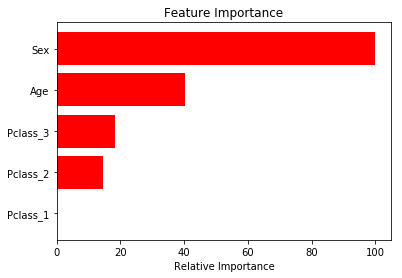

In [32]:
# 生成特征图
import matplotlib.pyplot as plt
feature_importance = clf.feature_importances_
important_features = X_train.columns.values
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5


plt.title("Feature Importance")
plt.barh(pos, feature_importance[sorted_idx[::-1]], color="r", align="center")
plt.yticks(pos, important_features)
plt.xlabel("Relative Importance")
plt.draw()
plt.show()

In [33]:
# 通过交叉验证来评估模型
from sklearn.cross_validation import cross_val_score
scores1 = cross_val_score(clf, X, y, cv=10)
scores1

array([ 0.82222222,  0.82222222,  0.7752809 ,  0.87640449,  0.82022472,
        0.76404494,  0.7752809 ,  0.76404494,  0.83146067,  0.78409091])

In [34]:
# 使用更多指标来评估模型
from sklearn import metrics
def measure_preformance(X, y, clf, show_accuracy=True,
                       show_classification_report=True,
                       show_confusion_matrix=True):
    
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")
        
measure_preformance(X_test, y_test, clf, show_classification_report=True,show_confusion_matrix=True)
        

Accuracy:0.834 

Classification report
             precision    recall  f1-score   support

          0       0.85      0.88      0.86       134
          1       0.81      0.76      0.79        89

avg / total       0.83      0.83      0.83       223
 

Confusion matrix
[[118  16]
 [ 21  68]] 



## 与随机森林进行比较

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=1000, random_state=33)
clf2 = clf2.fit(X_train, y_train)
scores2 = cross_val_score(clf2, X, y, cv=10)
clf2.feature_importances_

array([ 0.05507648,  0.02250083,  0.08197136,  0.46515733,  0.375294  ])

In [37]:
scores2.mean(), scores1.mean()

(0.81262938372488946, 0.80352769265690616)

## 可以看出 随机森林的准确率 要比决策树高 1个百分点